In [1]:
%env KERAS_BACKEND=tensorflow
import numpy as np
import matplotlib.pyplot as plt

env: KERAS_BACKEND=tensorflow


In [2]:
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [4]:
print('訓練總筆數',len(x_train))
print('測試總筆數',len(x_test))

訓練總筆數 25000
測試總筆數 25000


In [5]:
y_train[:10]

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

In [6]:
from keras.preprocessing import sequence

In [7]:
x_train_maxlen = sequence.pad_sequences(x_train, maxlen=150)
x_test_maxlen = sequence.pad_sequences(x_test, maxlen=150)

In [8]:
x_train.shape

(25000,)

In [9]:
N = 3 #文字要壓到N維
K = 4 #LSTM有K個神經元

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

In [11]:
model = Sequential()

model.add(Embedding(10000,N))
model.add(LSTM(K))

model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [12]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 3)           30000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 128       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 30,133
Trainable params: 30,133
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_fit_his = model.fit(x_train_maxlen,y_train, batch_size=32, epochs=5, validation_data = (x_test_maxlen, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 101s 4ms/step - loss: 0.5441 - acc: 0.7269 - val_loss: 0.4497 - val_acc: 0.7972
Epoch 2/5
25000/25000 [==============================] - 99s 4ms/step - loss: 0.3546 - acc: 0.8589 - val_loss: 0.3686 - val_acc: 0.8445
Epoch 3/5
25000/25000 [==============================] - 98s 4ms/step - loss: 0.2815 - acc: 0.8918 - val_loss: 0.3644 - val_acc: 0.8502
Epoch 4/5
25000/25000 [==============================] - 94s 4ms/step - loss: 0.2378 - acc: 0.9143 - val_loss: 0.3687 - val_acc: 0.8492
Epoch 5/5
25000/25000 [==============================] - 99s 4ms/step - loss: 0.2052 - acc: 0.9290 - val_loss: 0.4058 - val_acc: 0.8463


In [17]:
score = model.evaluate(x_train_maxlen, y_train)
print()
print("\t Accuracy of testing data = {:2.1f}%".format(score[1]*100.0))

25000/25000 [==============================] - 12s 488us/step

	 Accuracy of testing data = 94.2%


In [18]:
N1 = 50 #文字要壓到50維
K1 = 50 #LSTM有50個神經元

model_1 = Sequential()

model_1.add(Embedding(10000,N1))
model_1.add(LSTM(K1))

model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [19]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 50)          500000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 520,251
Trainable params: 520,251
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_1_fit_his = model_1.fit(x_train_maxlen,y_train, batch_size=32, epochs=5, validation_data = (x_test_maxlen, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 118s 5ms/step - loss: 0.3973 - acc: 0.8160 - val_loss: 0.3234 - val_acc: 0.8650
Epoch 2/5
25000/25000 [==============================] - 122s 5ms/step - loss: 0.2471 - acc: 0.9025 - val_loss: 0.3483 - val_acc: 0.8530
Epoch 3/5
25000/25000 [==============================] - 120s 5ms/step - loss: 0.1845 - acc: 0.9291 - val_loss: 0.3400 - val_acc: 0.8596
Epoch 4/5
25000/25000 [==============================] - 116s 5ms/step - loss: 0.1393 - acc: 0.9481 - val_loss: 0.4384 - val_acc: 0.8470
Epoch 5/5
25000/25000 [==============================] - 115s 5ms/step - loss: 0.1141 - acc: 0.9590 - val_loss: 0.4907 - val_acc: 0.8392


In [21]:
score_1 = model_1.evaluate(x_train_maxlen, y_train)
print()
print("\t Accuracy of testing data = {:2.1f}%".format(score_1[1]*100.0))

25000/25000 [==============================] - 22s 876us/step

	 Accuracy of testing data = 95.8%


In [22]:
N2 = 50 #文字要壓到50維
K2 = 8 #LSTM有8個神經元

model_2 = Sequential()

model_2.add(Embedding(10000,N2))
model_2.add(LSTM(K2))

model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [23]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 50)          500000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 1888      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 501,897
Trainable params: 501,897
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_2_fit_his = model_2.fit(x_train_maxlen,y_train, batch_size=32, epochs=5, validation_data = (x_test_maxlen, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 122s 5ms/step - loss: 0.4407 - acc: 0.7931 - val_loss: 0.3353 - val_acc: 0.8601
Epoch 2/5
25000/25000 [==============================] - 115s 5ms/step - loss: 0.2493 - acc: 0.9020 - val_loss: 0.3314 - val_acc: 0.8640
Epoch 3/5
25000/25000 [==============================] - 110s 4ms/step - loss: 0.1755 - acc: 0.9368 - val_loss: 0.3762 - val_acc: 0.8569
Epoch 4/5
25000/25000 [==============================] - 109s 4ms/step - loss: 0.1370 - acc: 0.9520 - val_loss: 0.3759 - val_acc: 0.8548
Epoch 5/5
25000/25000 [==============================] - 110s 4ms/step - loss: 0.1062 - acc: 0.9651 - val_loss: 0.4467 - val_acc: 0.8563


In [25]:
score_2 = model_2.evaluate(x_train_maxlen, y_train)
print()
print("\t Accuracy of testing data = {:2.1f}%".format(score_2[1]*100.0))

25000/25000 [==============================] - 13s 526us/step

	 Accuracy of testing data = 98.2%


In [26]:
N3 = 8 #文字要壓到8維
K3 = 50 #LSTM有50個神經元

model_3 = Sequential()

model_3.add(Embedding(10000,N3))
model_3.add(LSTM(K3))

model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [27]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 8)           80000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                11800     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 91,851
Trainable params: 91,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_3_fit_his = model_3.fit(x_train_maxlen,y_train, batch_size=32, epochs=5, validation_data = (x_test_maxlen, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 110s 4ms/step - loss: 0.4394 - acc: 0.7825 - val_loss: 0.3662 - val_acc: 0.8462
Epoch 2/5
25000/25000 [==============================] - 109s 4ms/step - loss: 0.2571 - acc: 0.9006 - val_loss: 0.3346 - val_acc: 0.8647
Epoch 3/5
25000/25000 [==============================] - 108s 4ms/step - loss: 0.2053 - acc: 0.9234 - val_loss: 0.3429 - val_acc: 0.8614
Epoch 4/5
25000/25000 [==============================] - 113s 5ms/step - loss: 0.1724 - acc: 0.9376 - val_loss: 0.3997 - val_acc: 0.8531
Epoch 5/5
25000/25000 [==============================] - 112s 4ms/step - loss: 0.1455 - acc: 0.9480 - val_loss: 0.3808 - val_acc: 0.8547


In [29]:
score_3 = model_3.evaluate(x_train_maxlen, y_train)
print()
print("\t Accuracy of testing data = {:2.1f}%".format(score_3[1]*100.0))

25000/25000 [==============================] - 12s 500us/step

	 Accuracy of testing data = 96.8%


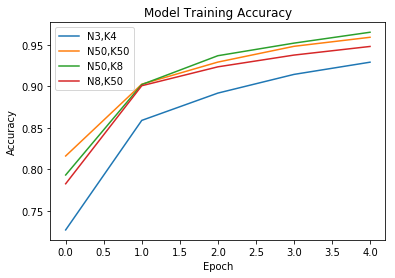

In [30]:
plt.plot(model_fit_his.history["acc"])
plt.plot(model_1_fit_his.history["acc"])
plt.plot(model_2_fit_his.history["acc"])
plt.plot(model_3_fit_his.history["acc"])

plt.title("Model Training Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["N3,K4","N50,K50","N50,K8","N8,K50"], loc="best")
plt.show()